In [1]:
import random
import numpy as np

import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
%precision 12
from __future__ import division

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def sigmoid(a):
    return 1/(1+np.exp(-a))
    

In [27]:
# initial x(2d vector) and target pair in 10*10 box

def initial_values(N): # N x 4 matrix
    return np.array([(1, np.random.uniform(0,10), np.random.uniform(0,10),np.random.binomial(1, 0.5) ) for i in range(N)])

def weight(): 
    return np.array([np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1)])


In [28]:
def linreg(x):
    return -w[0]/w[2]-x*w[1]/w[2]

In [29]:
N = 100
w = weight()
I = initial_values(N)
x = I[:,:3]
t = I[:,3]

for i in range(N):
    if x[:,2][i]>-0.5*x[:,1][i] + 6:
        t[i]=1
    else:
        t[i]=0


a= np.zeros(N)
y = np.zeros(N)
e = np.zeros(N)
turns = 1000
wlist =[w]
turn = 1
while turn < turns:
    for i in range(N):
        a[i] = np.dot(w, x[i])
        y[i] = sigmoid(a[i])
        e[i] = t[i] - y[i]

        eta = 0.1/N**(0.4)
        w =  w + eta * e[i] * x[i]
        wlist += [w]
        turn = turn +1

[0, 10, 0, 10]

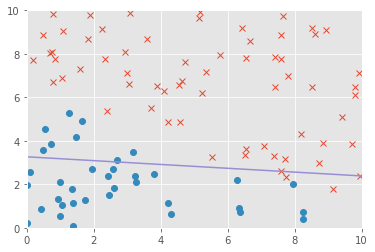

In [6]:
uplist = []
downlist = []
for i in range(N):
    if t[i]==1:
        uplist = uplist +[x[i]]
        
    else:
        downlist = downlist +[x[i]]
uplist = np.array(uplist)
downlist = np.array(downlist)

plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X,Y)
plt.axis([0,10,0,10])

3.26500149365 0.0879482795185


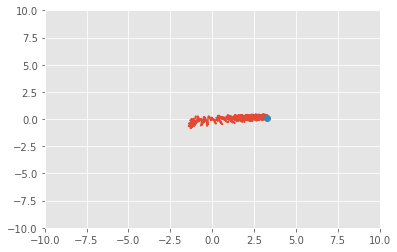

In [7]:
# the graph of y-intrsection vs slope of the linear graph
wlist = np.array(wlist)
plt.plot(-wlist[:,0]/wlist[:,2], wlist[:,1]/wlist[:,2])
plt.plot(-wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1], 'o')
plt.axis([-10,10,-10,10])
print -wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1]

[0, 10, 0, 10]

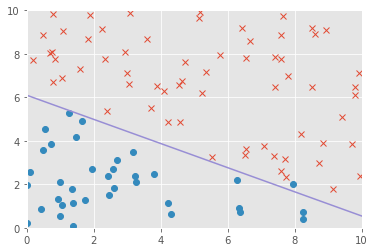

In [8]:
N = 100
w = weight()
I = initial_values(N)

# same t and x 

eta = 0.01
alpha = 0.01
turn = 1
turns = 1000
wlist=[w]
while turn < turns:
    a = np.dot(x, w)
    y = sigmoid(a)
    e = t - y
    g = -np.dot(np.transpose(x), e) # sum , batch 

    w = w - eta * ( g + alpha * w )
    wlist += [w]
    turn += 1
uplist = []
downlist = []
for i in range(N):
    if t[i]==1:
        uplist = uplist +[x[i]]
        
    else:
        downlist = downlist +[x[i]]
uplist = np.array(uplist)
downlist = np.array(downlist)

plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X,Y)
plt.axis([0,10,0,10])

6.09656407142 0.555191619694


[-10, 10, -10, 10]

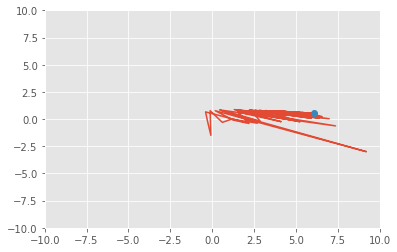

In [9]:
# the graph of y-intrsection vs slope of the linear graph
wlist = np.array(wlist)
plt.plot(-wlist[:,0]/wlist[:,2], wlist[:,1]/wlist[:,2])
plt.plot(-wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1], 'o')
print -wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1]
plt.axis([-10,10,-10,10])

In [10]:
w

array([-12.72875620241 ,   1.159160912592,   2.08785736577 ])

In [11]:
def initial_values(N): # N x 4 matrix
    return np.array([(1, np.random.uniform(0,5), np.random.uniform(0,10),np.random.binomial(1, 0.5) ) for i in range(N)])

def weight(): 
    return np.array([np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1)])

N = 100
w = weight()
I = initial_values(N)
x = I[:,:3]
t = I[:,3]

for i in range(N):
    if x[:,2][i]>-0.5*x[:,1][i] + 6:
        t[i]=1
    else:
        t[i]=0



/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


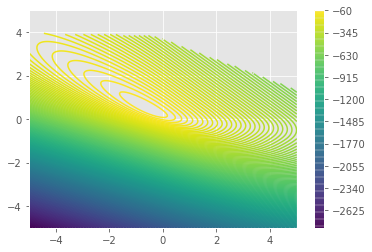

In [12]:
X = x[:,1:]
w1 = np.linspace(-5.0, 5.0, 200)
w2 = np.linspace(-5.0, 5.0, 200)
Z = np.zeros((200,200))

W1, W2 = np.meshgrid(w1, w2)
for i in range(200):
    for j in range(200):
        w = np.array((W1[i,j],W2[i,j]))
        Z[i,j] = np.dot( t, np.log(sigmoid(np.dot(X, w)))) + np.dot((1-t), np.log(1-sigmoid(np.dot(X, w))))
        

plt.contour(W1,W2,Z, 200)
plt.colorbar()


In [13]:
x[:10]

array([[ 1.            ,  1.477045285216,  2.968012113531],
       [ 1.            ,  1.830618369542,  4.23761345763 ],
       [ 1.            ,  3.715238376128,  4.528850680975],
       [ 1.            ,  4.857699303671,  2.813392827751],
       [ 1.            ,  0.023409331627,  8.272350986255],
       [ 1.            ,  3.189618466842,  6.985463231537],
       [ 1.            ,  3.430064431977,  7.030048183224],
       [ 1.            ,  2.660393535807,  2.993171587779],
       [ 1.            ,  0.381652477599,  9.495410651334],
       [ 1.            ,  0.564575931962,  3.195900078261]])

[0, 10, 0, 10]

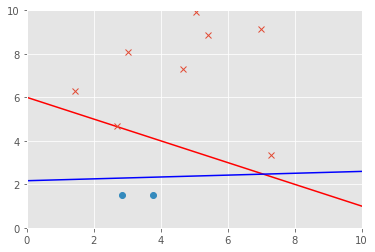

In [31]:

#plt.plot(x[:10][:,1], x[:10][:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = -0.5*X + 6
plt.plot(X,Y,color='r')
N = 10

eta = 0.01
alpha = 0.01
turn = 1
turns = 1000
wlist=[w]
while turn < turns:
    a = np.dot(x[:10], w)
    y = sigmoid(a)
    e = t[:10] - y
    g = -np.dot(np.transpose(x[:10]), e) # sum , batch 

    w = w - eta * ( g + alpha * w )
    wlist += [w]
    turn += 1
uplist = []
downlist = []
for i in range(N):
    if t[i]==1:
        uplist = uplist +[x[:10][i]]
        
    else:
        downlist = downlist +[x[:10][i]]
uplist = np.array(uplist)
downlist = np.array(downlist)

plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X,Y,color = 'b')
plt.axis([0,10,0,10])

In [19]:
x = x[:10]
t= t[:10]

def M(w, p, alpha):
    return  -np.dot(t, np.log(sigmoid(np.dot(x, w)))) - np.dot((1-t), np.log(1-sigmoid(np.dot(x, w)))) + 0.5*alpha* np.dot(w,w)

def H(w, p, alpha):
    return M(w, p, alpha)+np.dot(p,p)

def gradDescent(w, alpha):
    return alpha*w - np.dot((t-sigmoid(np.dot(x, w))),x)

alpha = 0.01

    
# initial point 
w0 = np.array([-10, 2,3]) 

Listw = [w0]

# number of samples 
N = 40000

eta = 0.01
epsilon = np.sqrt(2*eta)



for i in range(N): 
    p0 = np.random.normal(0,1,3)

    ph = p0 - epsilon* gradDescent(w0, alpha)/2.0
    wn = w0 + epsilon* ph
    pn = ph - epsilon* gradDescent(wn, alpha)/2.0
    

    a = H(wn, pn, alpha)/H(w0, p0, alpha)

    if a >=1:
        Listw = Listw +[wn]
        w0,p0 = wn, pn 
    else:
        if random.random() < a:
            Listw = Listw + [wn]
            w0,p0 = wn, pn
            


Listw = np.array(Listw)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [21]:
len(Listw)

39087

In [22]:
w

array([ 5.,  5.])

[-1, 6, -2, 7]

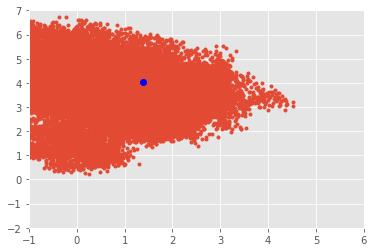

In [23]:
plt.plot(Listw[10000:][:,1], Listw[10000:][:,2], '.')
plt.plot(1.389690773801,   4.027060713918, 'o', color='b')
plt.axis([-1,6,-2,7])

In [24]:
selected_w = np.array([Listw[10000:][1000*i] for i in range(25)])

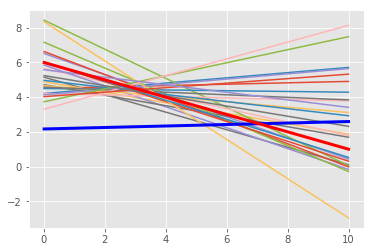

In [32]:
X = np.linspace(0.01, 10, 100)
Y = linreg(X)


for i in range(25):
    plt.plot(X, -(selected_w[:,0][i]+selected_w[:,1][i]*X)/selected_w[:,2][i])
plt.plot(X,Y, linewidth=3, color='b')

X = np.linspace(0.01, 10, 100)


Y = -0.5*X + 6
plt.plot(X,Y,linewidth=3,color='r')


plt.show()

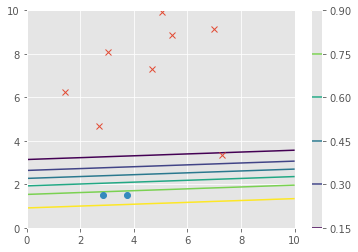

In [33]:
XX, YY = np.meshgrid(X, X)
Z = sigmoid(-w[0]-w[1]*XX-w[2]*YY)
plt.contour(XX, YY, Z)
plt.colorbar()
plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')

In [34]:
XX, YY = np.meshgrid(X, X)

Z = []
for i in range(25):
    w = selected_w[i]
    Z.append(sigmoid(-w[0]-w[1]*XX-w[2]*YY))


In [35]:
Z = np.array(Z)
np.shape(Z)

(25, 100, 100)

In [36]:
np.shape(sum(Z))

(100, 100)

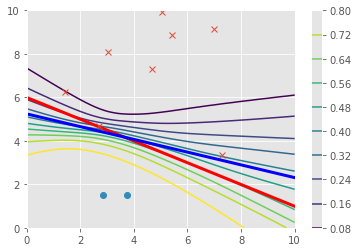

In [37]:
ZZ = sum(Z)/30
plt.contour(XX, YY, ZZ, 10)
X = np.linspace(0.01, 10, 100)
Y = -0.5*X + 6
plt.plot(X,Y,color='r', linewidth=3)
plt.colorbar()
plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')

X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X, Y, linewidth=3, color = 'b')

In [48]:
w

array([-21.017902938782,   1.389690773801,   4.027060713918])

In [22]:
import random
import numpy as np

import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
%precision 12
from __future__ import division

%matplotlib inline
plt.style.use('ggplot')

In [10]:
X = np.zeros((5,5))
X[:,0]=1
X[:,3]=1
X1 = X
X

array([[ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.]])

In [13]:
X = np.zeros((5,5))
X[3:]=1
X2 = X
X2

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [15]:
X = np.zeros((5,5))
X[:,1]=1
X[:,3:]=1
X3 = X
X3

array([[ 0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  1.]])

In [16]:
X = np.zeros((5,5))
X[0] = 1
X[3] = 1
X4=X
X4

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [45]:
XX = np.zeros((4,25))
XX[0] = X1.reshape(25,)
XX[1] = X2.reshape(25,)
XX[2] = X3.reshape(25,)
XX[3] = X4.reshape(25,)

In [48]:
XX = 2*(XX-0.5)

In [49]:
XX

array([[ 1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
         1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
         1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.]])

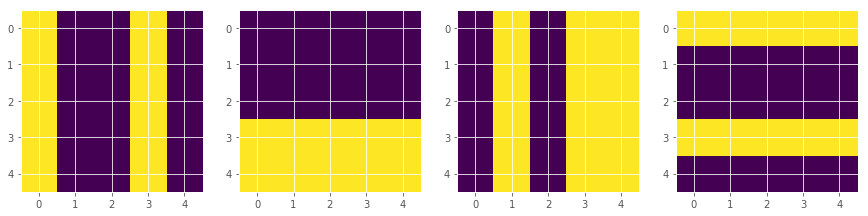

In [50]:
def display(X):
    plt.imshow(X.reshape((5,5)))

fig = plt.figure(figsize=(15,4))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1)
    display(XX[i])

In [51]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(range(25))

In [52]:
wake = np.zeros((25,25))
for i in range(25):
    for j in range(25):
        for k in range(4):
            wake[i,j] += XX[k][i]*XX[k][j]
            G.add_edge(i,j, weight = wake[i,j])

In [53]:
wake

array([[ 4.,  0.,  2.,  2.,  0.,  2., -2.,  0.,  0., -2.,  2., -2.,  0.,
         0., -2.,  2., -2.,  0.,  0., -2.,  0., -4., -2., -2., -4.],
       [ 0.,  4.,  2.,  2.,  4., -2.,  2.,  0.,  0.,  2., -2.,  2.,  0.,
         0.,  2., -2.,  2.,  0.,  0.,  2., -4.,  0., -2., -2.,  0.],
       [ 2.,  2.,  4.,  0.,  2.,  0.,  0.,  2., -2.,  0.,  0.,  0.,  2.,
        -2.,  0.,  0.,  0.,  2., -2.,  0., -2., -2.,  0., -4., -2.],
       [ 2.,  2.,  0.,  4.,  2.,  0.,  0., -2.,  2.,  0.,  0.,  0., -2.,
         2.,  0.,  0.,  0., -2.,  2.,  0., -2., -2., -4.,  0., -2.],
       [ 0.,  4.,  2.,  2.,  4., -2.,  2.,  0.,  0.,  2., -2.,  2.,  0.,
         0.,  2., -2.,  2.,  0.,  0.,  2., -4.,  0., -2., -2.,  0.],
       [ 2., -2.,  0.,  0., -2.,  4.,  0.,  2.,  2.,  0.,  4.,  0.,  2.,
         2.,  0.,  0., -4., -2., -2., -4.,  2., -2.,  0.,  0., -2.],
       [-2.,  2.,  0.,  0.,  2.,  0.,  4.,  2.,  2.,  4.,  0.,  4.,  2.,
         2.,  4., -4.,  0., -2., -2.,  0., -2.,  2.,  0.,  0.,  2.],
      

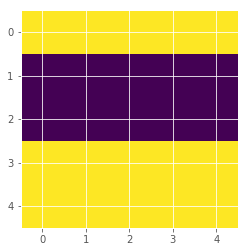

In [77]:
X = np.zeros((5,5))
X[0] = 1
X[3] = 1
X[4]=1
testX=X
testX = testX.reshape(25,)
display(testX)

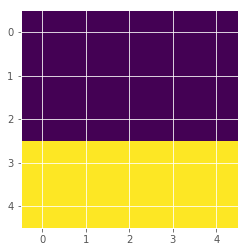

In [78]:
a = np.dot(wake,testX)
for j in range(100):
    a = np.dot(wake,testX)
    for i in range(25):
        if random.random() < 1/(1+np.exp(-2*a[i])):
            testX[i] = 1
        else :
            testX[i]=-1
display(testX)

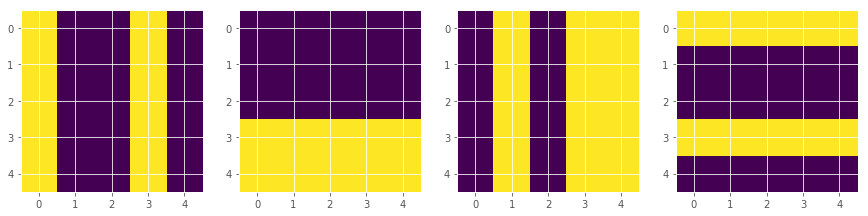

In [64]:
fig = plt.figure(figsize=(15,4))
for j in range(4):
    ax = fig.add_subplot(1, 4, j+1)
    for i in range(25):
        a = np.dot(wake,XX[j])
        if random.random() < 1/(1+np.exp(-2*a[i])):
            XX[j,i] = 1
        else :
            XX[j,i]=-1
    display(XX[j])